# Image Analysis with WARCs

## This new guide aims at demonstrating how to extract images from a WARC file to use for image analysis.

This first part of the code just checks whether there are images (of various extensions) within the WARC file to make sure that they have been saved properly and we have material to work with.

In [7]:
from warcio.archiveiterator import ArchiveIterator

# List of common image file extensions; change as needed
image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']

def check_for_images(warc_file):
    with open(warc_file, 'rb') as stream:
        for record in ArchiveIterator(stream):
            if record.rec_type == 'response':
                url = record.rec_headers.get_header('WARC-Target-URI')
                for ext in image_extensions:
                    if url.lower().endswith(ext):
                        print(f"Found image at URL: {url}")
                        break  

if __name__ == "__main__":
    warc_file = "path/to/BE-942855-2457-258_P.warc"
    check_for_images(warc_file)

Found image at URL: https://images.squarespace-cdn.com/content/v1/5c83afee3560c33561cc139f/1592332890789-LMMPO89F60NU8RH5UO74/Dhammakaya-meditatie+3.jpeg
Found image at URL: https://images.squarespace-cdn.com/content/v1/5c83afee3560c33561cc139f/1672242318572-H5AZEKETTMDJSHHBHSWY/unsplash-image-7AcMUSYRZpU.jpg
Found image at URL: https://images.squarespace-cdn.com/content/v1/5c83afee3560c33561cc139f/1672168045876-QWT00CACJPWUPIIR687F/unsplash-image-ie8WW5KUx3o.jpg
Found image at URL: https://assets.squarespace.com/universal/images-v6/damask/trash-9-red@2x.png
Found image at URL: https://assets.squarespace.com/universal/images-v6/damask/trash-9-light@2x.png
Found image at URL: https://static1.squarespace.com/universal/images-v6/damask/image-inside-128-dark.png
Found image at URL: https://assets.squarespace.com/universal/images-v6/damask/edit-info-light@2x.png
Found image at URL: https://assets.squarespace.com/universal/images-v6/damask/play-button@2x.png
Found image at URL: https://asset

If you wish to extract the images and save them locally, run the following block of code; you can also do this step by using the Image Extraction Tool available in this repository. Otherwise, you can skip it, as we will be working with the images by reading them directly into memory. As with the previous notebook, remember to change the paths to where your files are stored and where you want to save the images.

In [ ]:
import os

def save_images(warc_file, save_dir):
    with open(warc_file, 'rb') as stream:
        for record in warcio.ArchiveIterator(stream):
            if record.rec_type == 'response':
                url = record.rec_headers.get_header('WARC-Target-URI')
                for ext in image_extensions:
                    if url.lower().endswith(ext):
                        print(f"Found image at URL: {url}")

                        image_data = record.content_stream().read()

                        filename = os.path.join(save_dir, os.path.basename(url))
                        with open(filename, 'wb') as image_file:
                            image_file.write(image_data)

                        print(f"Saved image to: {filename}")

warc_file_path = 'path/to/BE-942855-2457-258_P.warc'
save_directory = 'path/to/folder'

if not os.path.exists(save_directory):
    os.makedirs(save_directory)

save_images(warc_file_path, save_directory)

Next, we can display the images we are going to work with. With this step you can easily look at the images yourself to analyze them, although we can still do much more with them using different image segmentation and classification tools, as well as machine learning models!

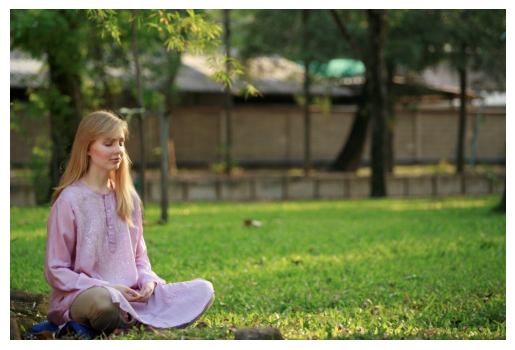

Displayed image from URL: https://images.squarespace-cdn.com/content/v1/5c83afee3560c33561cc139f/1592332890789-LMMPO89F60NU8RH5UO74/Dhammakaya-meditatie+3.jpeg


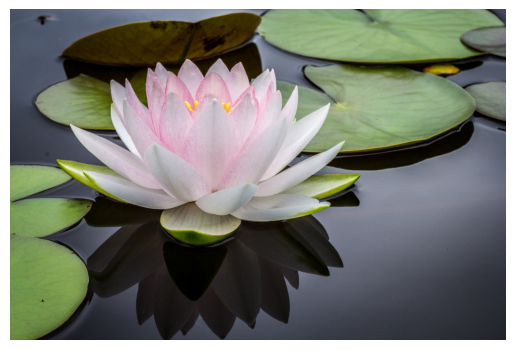

Displayed image from URL: https://images.squarespace-cdn.com/content/v1/5c83afee3560c33561cc139f/1672242318572-H5AZEKETTMDJSHHBHSWY/unsplash-image-7AcMUSYRZpU.jpg


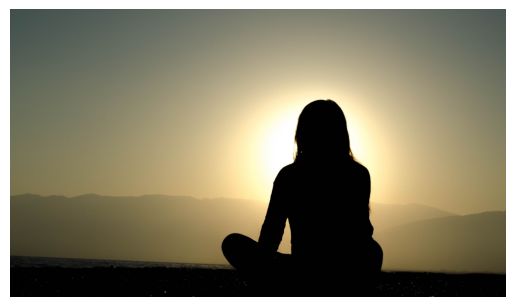

Displayed image from URL: https://images.squarespace-cdn.com/content/v1/5c83afee3560c33561cc139f/1672168045876-QWT00CACJPWUPIIR687F/unsplash-image-ie8WW5KUx3o.jpg
Error processing image: cannot identify image file <_io.BytesIO object at 0x00000255A62D13B0>
Error processing image: cannot identify image file <_io.BytesIO object at 0x000002568A4C1E50>


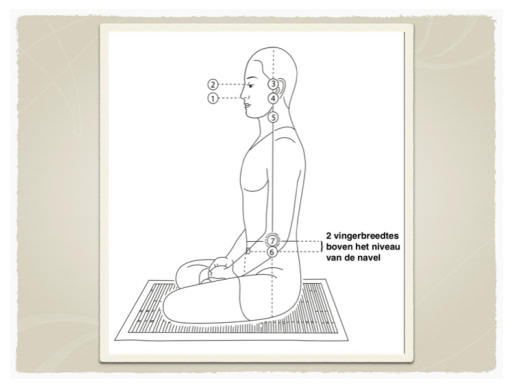

Displayed image from URL: https://images.squarespace-cdn.com/content/v1/5c83afee3560c33561cc139f/1553705454915-HEGX8NLESBWX61DF1Y7D/1.+Meditatie+Stap+voor+stap+vfs.004.jpeg


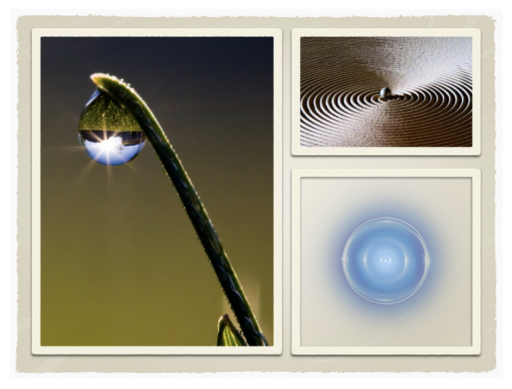

Displayed image from URL: https://images.squarespace-cdn.com/content/v1/5c83afee3560c33561cc139f/1553613907678-18PM9S6M776NQ59LDCZF/1.+Meditatie+Stap+voor+stap+vfs.006.jpeg


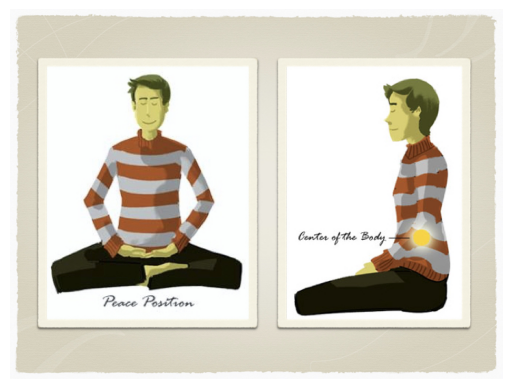

Displayed image from URL: https://images.squarespace-cdn.com/content/v1/5c83afee3560c33561cc139f/1553104589155-O7LH4B332ND6EWGS8BMW/1.+Meditatie+Stap+voor+stap+aangepaste+versie.003.jpeg


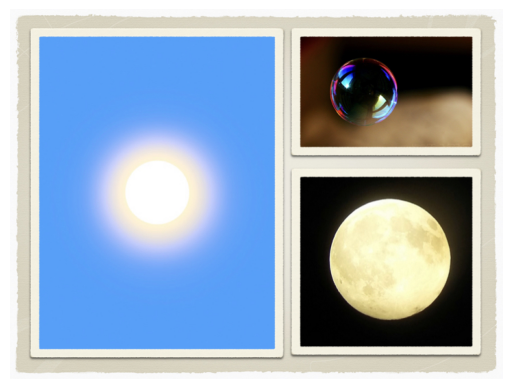

Displayed image from URL: https://images.squarespace-cdn.com/content/v1/5c83afee3560c33561cc139f/1553104593378-Y2GA4CHJQWS1OAY7URCC/1.+Meditatie+Stap+voor+stap+aangepaste+versie.005.jpeg


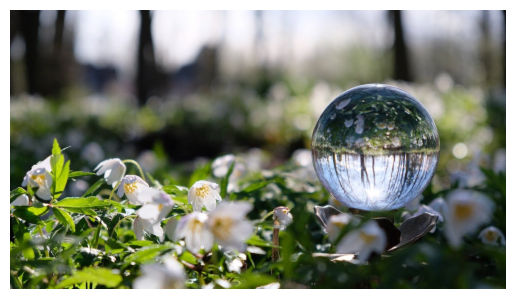

Displayed image from URL: https://images.squarespace-cdn.com/content/v1/5c83afee3560c33561cc139f/1580927433827-3H827GX2RII8M3728YLJ/Bron+van+Stilte-Parel.jpeg
Error processing image: cannot identify image file <_io.BytesIO object at 0x00000255A67BC090>


In [30]:
import io
from PIL import Image
import matplotlib.pyplot as plt

image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'] # Change to whichever image archives you wish to
                                                                               # explore.
    
exclude_domains = ['https://assets.squarespace.com','https://maps.gstatic.com'] # If you notice there are images from a 
                                                                                # particular website that are not useful to your 
                                                                                # research, you can exclude them here. E.g. I 
                                                                                # didn't find the assets to be useful, so I got 
                                                                                # rid of them.

def display_images_from_warc(warc_file):
    with open(warc_file, 'rb') as stream:
        for record in ArchiveIterator(stream):
            if record.rec_type == 'response':
                url = record.rec_headers.get_header('WARC-Target-URI')
                if not any(url.startswith(domain) for domain in exclude_domains) and any(url.endswith(ext) 
                                                                                          for ext in image_extensions):
                    try:
                        image_data = record.content_stream().read()
                        image_stream = io.BytesIO(image_data)
                        image = Image.open(image_stream)
                        plt.imshow(image)
                        plt.axis('off')
                        plt.show()
                        print(f"Displayed image from URL: {url}")
                    except Exception as e:
                        print(f"Error processing image: {e}")

if __name__ == "__main__":
    warc_file = "path/to/BE-942855-2457-258_P.warc"
    display_images_from_warc(warc_file)


Let's try out a machine learning model. We will use Tensorflow and Keras, which will provide an artificial neural network. We begin by installing the necessary modules and importing libraries.

In [ ]:
pip install tensorflow keras

In [4]:
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

Let's now use it! This model will make predictions based on what it thinks is on the image.

1/1 [==============================] - 1s 1s/step
Predictions for image from URL https://images.squarespace-cdn.com/content/v1/5c83afee3560c33561cc139f/1592332890789-LMMPO89F60NU8RH5UO74/Dhammakaya-meditatie+3.jpeg:
swing: 0.17
croquet_ball: 0.06
baseball: 0.03
cellular_telephone: 0.02
toilet_tissue: 0.02


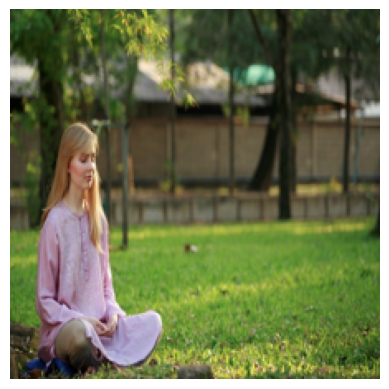

1/1 [==============================] - 0s 50ms/step
Predictions for image from URL https://images.squarespace-cdn.com/content/v1/5c83afee3560c33561cc139f/1672242318572-H5AZEKETTMDJSHHBHSWY/unsplash-image-7AcMUSYRZpU.jpg:
daisy: 0.11
plate_rack: 0.04
pot: 0.03
artichoke: 0.03
head_cabbage: 0.02


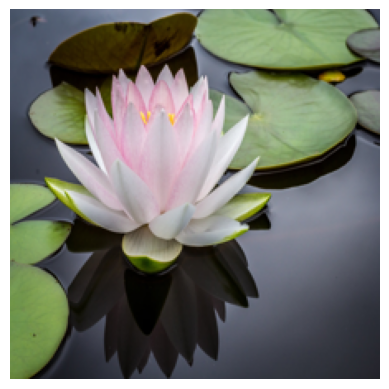

1/1 [==============================] - 0s 66ms/step
Predictions for image from URL https://images.squarespace-cdn.com/content/v1/5c83afee3560c33561cc139f/1672168045876-QWT00CACJPWUPIIR687F/unsplash-image-ie8WW5KUx3o.jpg:
megalith: 0.40
abaya: 0.16
obelisk: 0.09
cloak: 0.04
umbrella: 0.04


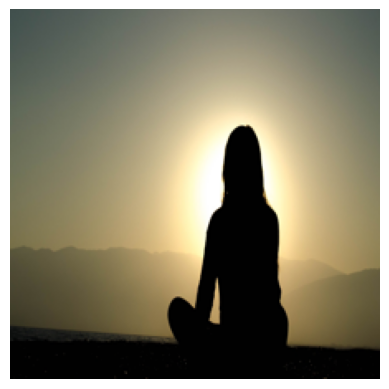

Error processing image from URL https://static1.squarespace.com/universal/images-v6/damask/image-inside-128-dark.png: cannot identify image file <_io.BytesIO object at 0x00000242263C8F90>
Error processing image from URL https://static1.squarespace.com/universal/images-v6/icons/block-indicator-dark@2x.png: cannot identify image file <_io.BytesIO object at 0x000002422B522E00>
1/1 [==============================] - 0s 49ms/step
Predictions for image from URL https://images.squarespace-cdn.com/content/v1/5c83afee3560c33561cc139f/1553705454915-HEGX8NLESBWX61DF1Y7D/1.+Meditatie+Stap+voor+stap+vfs.004.jpeg:
binder: 0.34
envelope: 0.26
book_jacket: 0.05
dishwasher: 0.02
lighter: 0.02


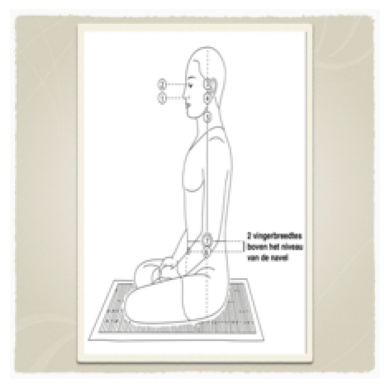

1/1 [==============================] - 0s 46ms/step
Predictions for image from URL https://images.squarespace-cdn.com/content/v1/5c83afee3560c33561cc139f/1553613907678-18PM9S6M776NQ59LDCZF/1.+Meditatie+Stap+voor+stap+vfs.006.jpeg:
spotlight: 0.25
fountain: 0.06
quill: 0.05
hook: 0.05
loudspeaker: 0.03


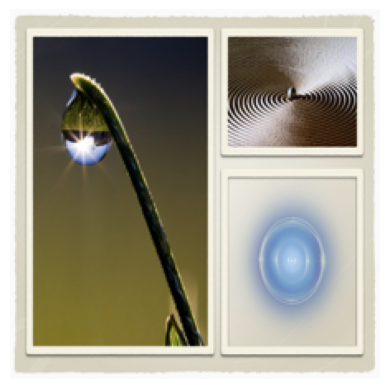

1/1 [==============================] - 0s 52ms/step
Predictions for image from URL https://images.squarespace-cdn.com/content/v1/5c83afee3560c33561cc139f/1553104589155-O7LH4B332ND6EWGS8BMW/1.+Meditatie+Stap+voor+stap+aangepaste+versie.003.jpeg:
television: 0.22
jersey: 0.08
web_site: 0.06
monitor: 0.04
screen: 0.03


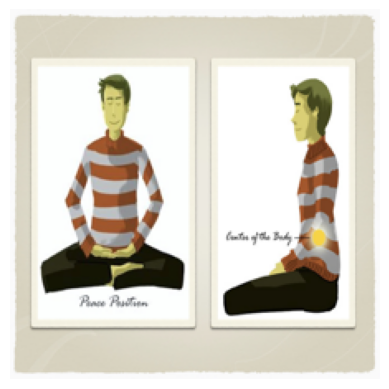

1/1 [==============================] - 0s 57ms/step
Predictions for image from URL https://images.squarespace-cdn.com/content/v1/5c83afee3560c33561cc139f/1553104593378-Y2GA4CHJQWS1OAY7URCC/1.+Meditatie+Stap+voor+stap+aangepaste+versie.005.jpeg:
spotlight: 0.17
traffic_light: 0.10
web_site: 0.03
switch: 0.02
gong: 0.02


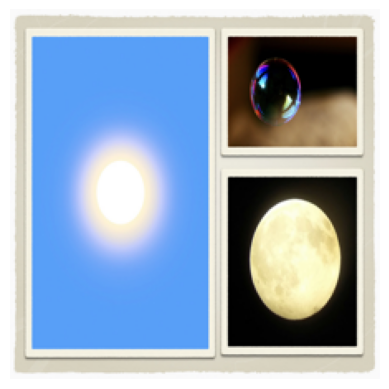

1/1 [==============================] - 0s 56ms/step
Predictions for image from URL https://images.squarespace-cdn.com/content/v1/5c83afee3560c33561cc139f/1580927433827-3H827GX2RII8M3728YLJ/Bron+van+Stilte-Parel.jpeg:
croquet_ball: 0.10
golf_ball: 0.07
snail: 0.07
spotlight: 0.06
park_bench: 0.03


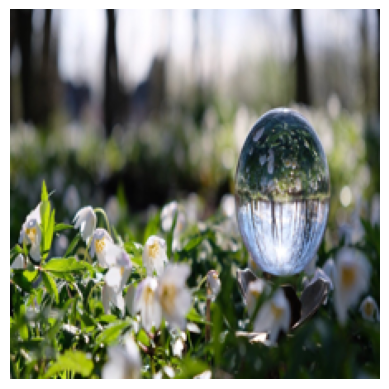

Error processing image from URL https://www.bronvanstilte.be/universal/images-v6/icons/cover-pages-map-marker-pin-dark-2x.png: cannot identify image file <_io.BytesIO object at 0x000002422BCBCEF0>


In [32]:
image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'] # Change to whichever image archives you wish to
                                                                               # explore.
    
exclude_domains = ['https://assets.squarespace.com','https://maps.gstatic.com'] # If you notice there are images from a 
                                                                                # particular website that are not useful to your 
                                                                                # research, you can exclude them here. E.g. I 
                                                                                # didn't find the assets to be useful, so I got 
                                                                                # rid of them.

def classify_images_from_warc(warc_file):
    model = MobileNetV2(weights='imagenet', include_top=True)

    with open(warc_file, 'rb') as stream:
        for record in ArchiveIterator(stream):
            if record.rec_type == 'response':
                url = record.rec_headers.get_header('WARC-Target-URI')
                if not any(url.startswith(domain) for domain in exclude_domains) and any(url.endswith(ext) 
                                                                                          for ext in image_extensions):
                    try:
                        image_data = record.content_stream().read()
                        image_stream = io.BytesIO(image_data)
                        image = Image.open(image_stream)
                        
                        image = image.resize((224, 224))
                        
                        img_array = np.array(image)
                        
                        img_array = preprocess_input(img_array)
                        img_array = np.expand_dims(img_array, axis=0)
                        
                        predictions = model.predict(img_array)
                        decoded_predictions = decode_predictions(predictions, top=5)[0]
                        
                        print(f"Predictions for image from URL {url}:")
                        for _, label, confidence in decoded_predictions:
                            print(f"{label}: {confidence:.2f}")
                        
                        plt.imshow(image)
                        plt.axis('off')
                        plt.show()
                        
                    except Exception as e:
                        print(f"Error processing image from URL {url}: {e}")
                        continue

if __name__ == "__main__":
    warc_file = "path/to/BE-942855-2457-258_P.warc"
    classify_images_from_warc(warc_file)


As we can see, these are not extremely accurate; it for example interprets the silhouette of the woman meditating as an obelisk. Perhaps for more metaphorical or romantic interpretations of these images, the results would prove useful, but this model does not seem to completely grasp the contents of the image. Additionally, the images may simply be too small or unclear for the model. Let's try a different one.

In [ ]:
pip install opencv-python-headless opencv-contrib-python-headless

In [40]:
import requests

yolo_cfg_url = "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"
yolo_weights_url = "https://pjreddie.com/media/files/yolov3.weights"
coco_names_url = "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

yolo_cfg_file = "yolov3.cfg"
yolo_weights_file = "yolov3.weights"
coco_names_file = "coco.names"

response_cfg = requests.get(yolo_cfg_url)
response_weights = requests.get(yolo_weights_url)
response_coco_names = requests.get(coco_names_url)

with open(yolo_cfg_file, "wb") as file:
    file.write(response_cfg.content)

with open(yolo_weights_file, "wb") as file:
    file.write(response_weights.content)

with open(coco_names_file, "wb") as file:
    file.write(response_coco_names.content)

print("YOLOv3 files downloaded successfully.")


YOLOv3 files downloaded successfully.


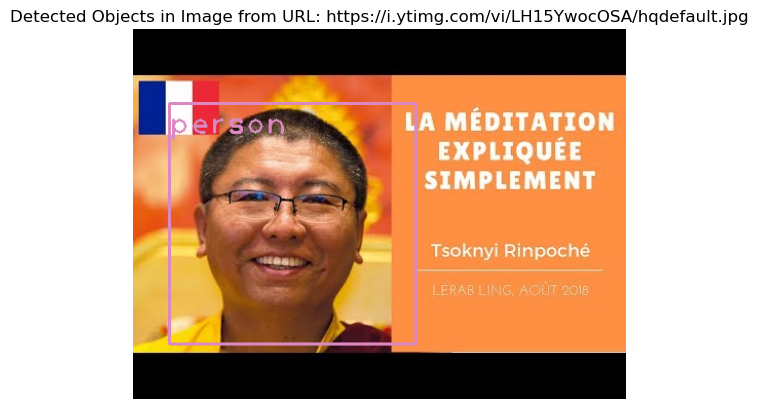

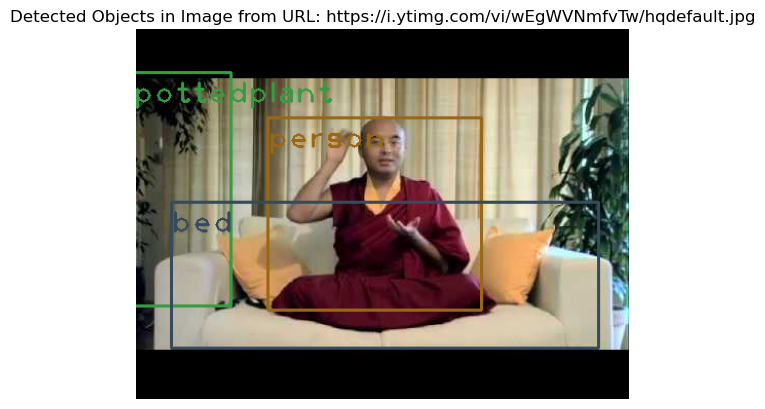

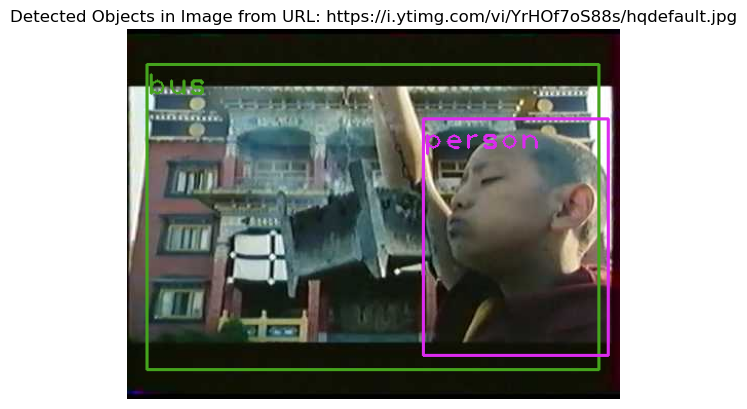

In [15]:
import cv2
image_extensions = ['.jpg', '.jpeg'] # Change to whichever image archives you wish to explore.
    
exclude_domains = ['https://assets.squarespace.com','https://maps.gstatic.com'] # If you notice there are images from a 
                                                                                # particular website that are not useful to your 
                                                                                # research, you can exclude them here. E.g. I 
                                                                                # didn't find the assets to be useful, so I got 
                                                                                # rid of them.
                
def detect_objects_yolo(warc_file):
    net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
    with open("coco.names", "r") as f:
        classes = [line.strip() for line in f.readlines()]

    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

    with open(warc_file, 'rb') as stream:
        for record in ArchiveIterator(stream):
            if record.rec_type == 'response':
                url = record.rec_headers.get_header('WARC-Target-URI')
                if not any(url.startswith(domain) for domain in exclude_domains) and any(url.endswith(ext) 
                                                                                          for ext in image_extensions):
                    if "hqdefault" in url.lower(): # I added this line of code because I am only interested in the high
                                                   # quality images of the website, which all contained the string "hqdefault"
                                                   # in their url; feel free to change it or, if you wish to check all the 
                                                   # images in your WARC file, simply delete this line of code. The larger the
                                                   # amount of images you process, the longer it will take.
                        try:
                            image_data = record.content_stream().read()
                            image = Image.open(io.BytesIO(image_data))

                            image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
                            height, width, _ = image_cv.shape

                            blob = cv2.dnn.blobFromImage(image_cv, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
                            net.setInput(blob)
                            outs = net.forward(output_layers)

                            class_ids = []
                            confidences = []
                            boxes = []
                            for out in outs:
                                for detection in out:
                                    scores = detection[5:]
                                    class_id = np.argmax(scores)
                                    confidence = scores[class_id]
                                    if confidence > 0.5:
                                        center_x = int(detection[0] * width)
                                        center_y = int(detection[1] * height)
                                        w = int(detection[2] * width)
                                        h = int(detection[3] * height)
                                        x = int(center_x - w / 2)
                                        y = int(center_y - h / 2)
                                        boxes.append([x, y, w, h])
                                        confidences.append(float(confidence))
                                        class_ids.append(class_id)

                            indexes = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.5, nms_threshold=0.4)

                            colors = np.random.uniform(0, 255, size=(len(classes), 3))
                            for i in range(len(boxes)):
                                if i in indexes:
                                    x, y, w, h = boxes[i]
                                    label = str(classes[class_ids[i]])
                                    color = colors[class_ids[i]]
                                    cv2.rectangle(image_cv, (x, y), (x + w, y + h), color, 2)
                                    cv2.putText(image_cv, label, (x, y + 30), cv2.FONT_HERSHEY_PLAIN, 2, color, 2)

                            image_cv_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

                            plt.imshow(image_cv_rgb)
                            plt.axis('off')
                            plt.title(f"Detected Objects in Image from URL: {url}")
                            plt.show()

                        except Exception as e:
                            print(f"Error processing image from URL {url}: {e}")
                            continue  

                        
if __name__ == "__main__":
    warc_file = "path/to/BE-942855-2457-94_P.warc.gz.gz"
    detect_objects_yolo(warc_file)

With this model, we can no only detect what's in the images, but also put boxes around each object. The model is still not perfect at recognizing objects, as it classifies a building as a bus, but it works slightly better. These machine learning models may work well in analyzing large corpuses of images once they have sufficient training for adequately recognizing objects; for now, let's move back to a more human analysis.

Let's now install scikit-image and use it for the segmentation of our images. Segmentation may help us in recognizing color palettes favored, for example. Let's see it in action.

In [ ]:
pip install scikit-image

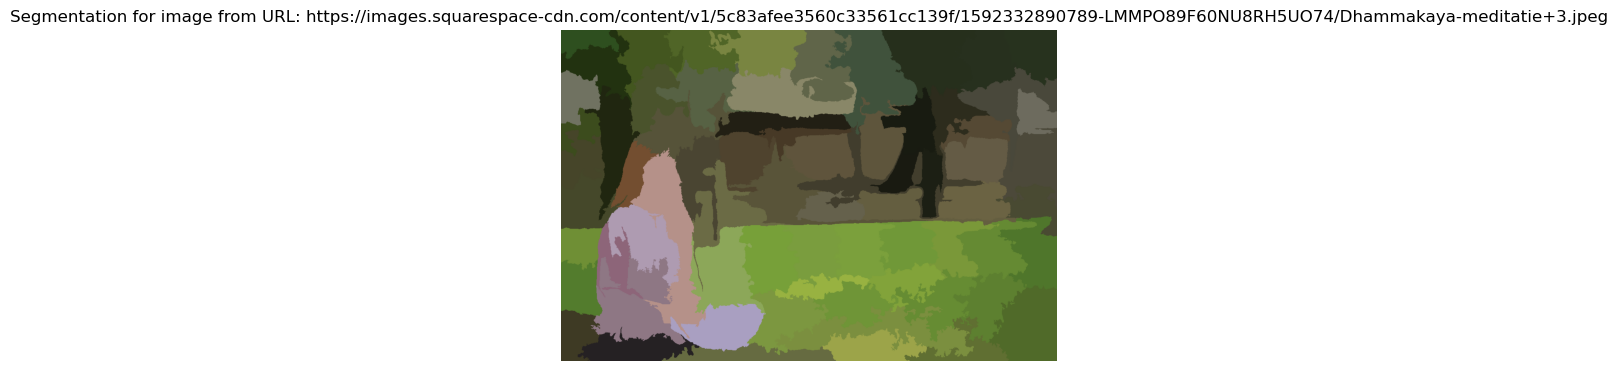

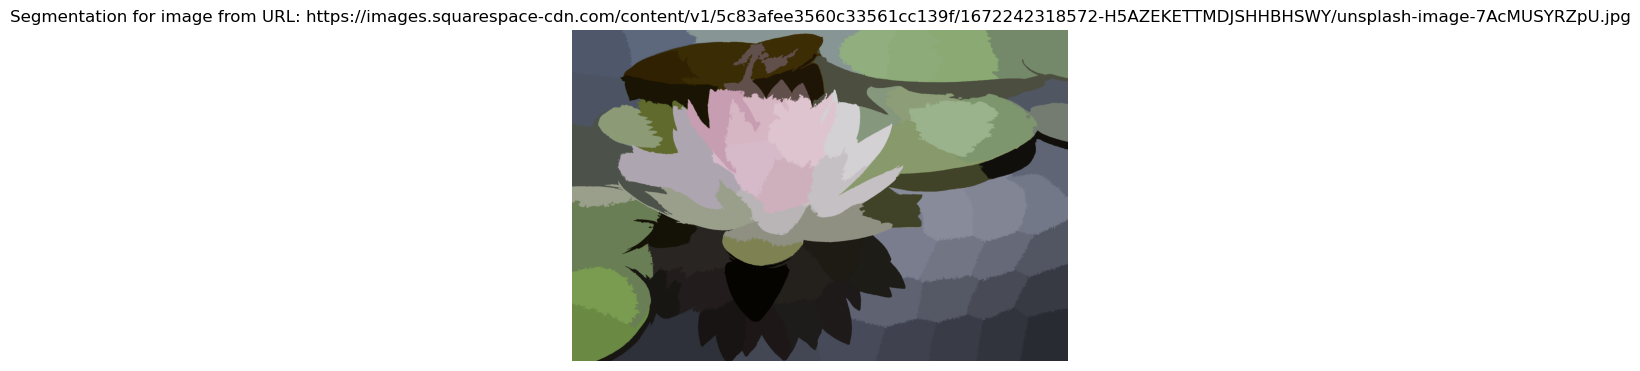

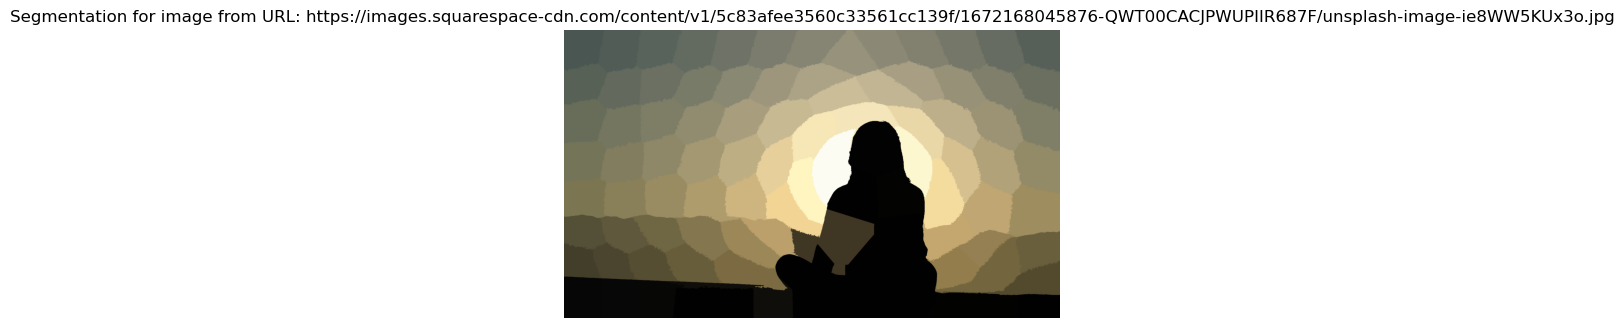

Error processing image from URL https://static1.squarespace.com/universal/images-v6/damask/image-inside-128-dark.png: cannot identify image file <_io.BytesIO object at 0x00000242124599A0>
Error processing image from URL https://static1.squarespace.com/universal/images-v6/icons/block-indicator-dark@2x.png: cannot identify image file <_io.BytesIO object at 0x000002421D52ABD0>


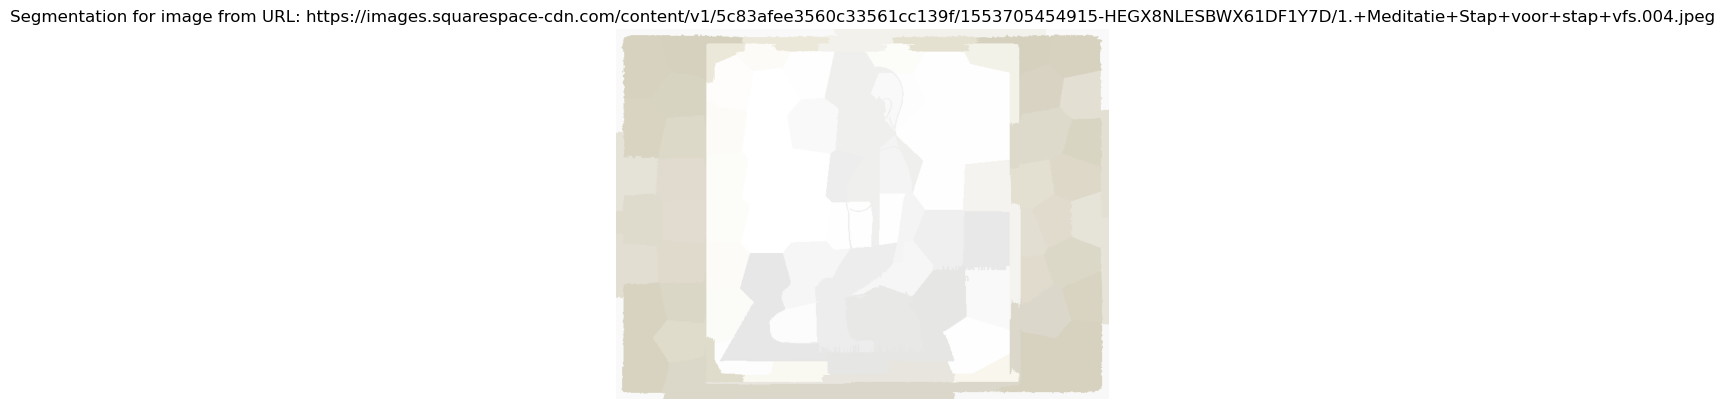

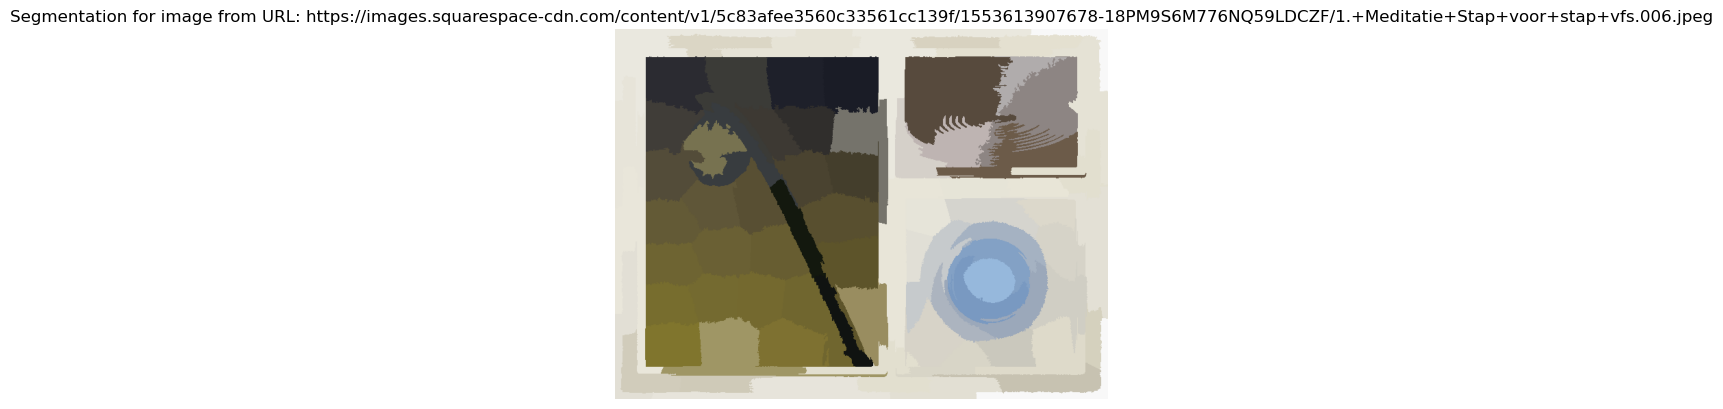

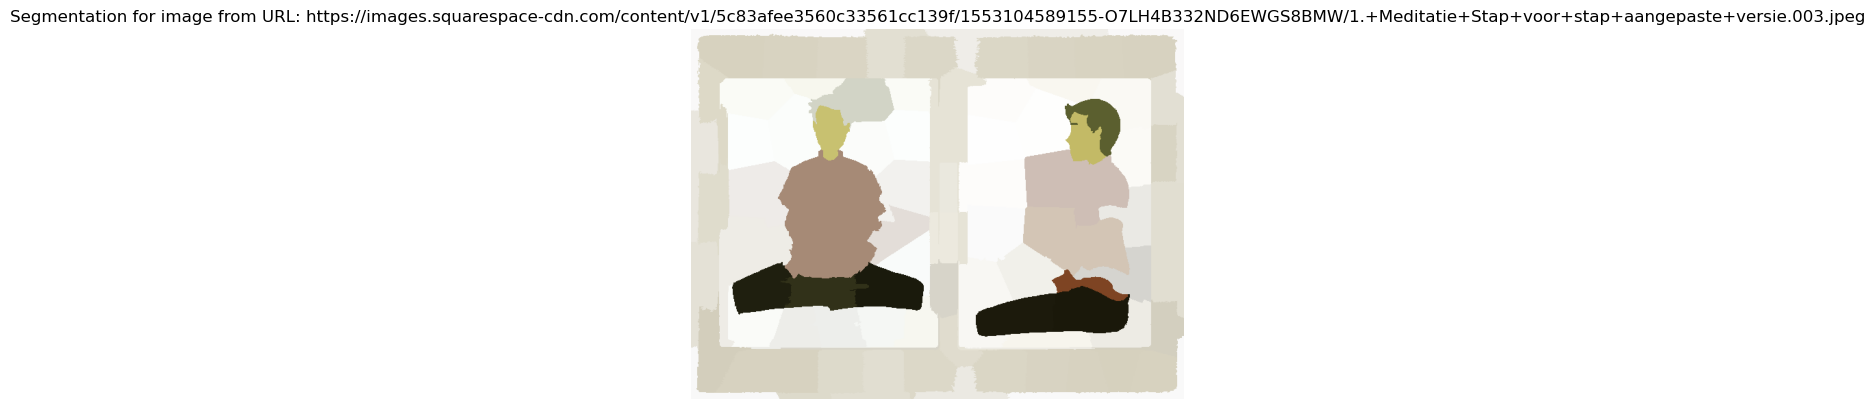

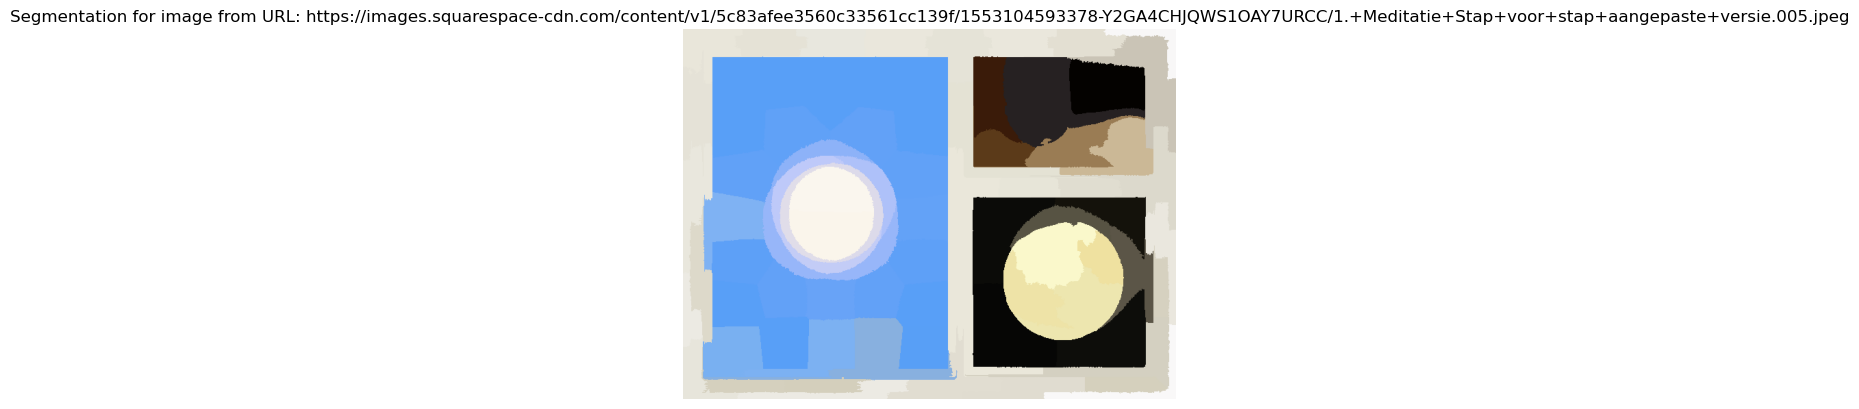

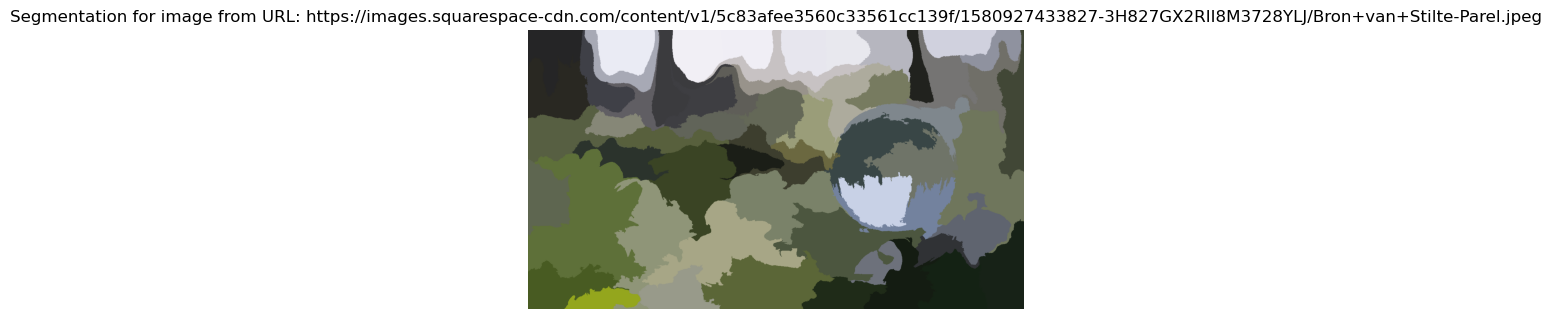

Error processing image from URL https://www.bronvanstilte.be/universal/images-v6/icons/cover-pages-map-marker-pin-dark-2x.png: cannot identify image file <_io.BytesIO object at 0x0000024232A9C9F0>


In [34]:
from skimage import segmentation, color
from skimage.util import img_as_ubyte

image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'] # Change to whichever image archives you wish to
                                                                               # explore.
    
exclude_domains = ['https://assets.squarespace.com','https://maps.gstatic.com'] # If you notice there are images from a 
                                                                                # particular website that are not useful to your 
                                                                                # research, you can exclude them here. E.g. I 
                                                                                # didn't find the assets to be useful, so I got 
                                                                                # rid of them.

def segment_images_from_warc(warc_file):
    with open(warc_file, 'rb') as stream:
        for record in ArchiveIterator(stream):
            if record.rec_type == 'response':
                url = record.rec_headers.get_header('WARC-Target-URI')
                if not any(url.startswith(domain) for domain in exclude_domains) and any(url.endswith(ext) 
                                                                                          for ext in image_extensions):
                    try:
                        image_data = record.content_stream().read()
                        image = Image.open(io.BytesIO(image_data))
                        
                        image_array = img_as_ubyte(image)
                        
                        segments = segmentation.slic(image_array, n_segments=100, compactness=10)
                        
                        segmented_image = color.label2rgb(segments, image_array, kind='avg')
                        
                        plt.imshow(segmented_image)
                        plt.axis('off')
                        plt.title(f"Segmentation for image from URL: {url}")
                        plt.show()
                        
                    except Exception as e:
                        print(f"Error processing image from URL {url}: {e}")
                        continue 

if __name__ == "__main__":
    warc_file = "path/to/BE-942855-2457-258_P.warc"
    segment_images_from_warc(warc_file)

By segmenting these images we can more easily see the colors used in Buddhist websites: generally muted, not overly-saturated colors, with emphasis on blues and greens, which are associated with nature and water. These colors can produce the feelings of calmness and connectedness associated with Buddhism in the Western world. Additionally, these images are rather simple, never too overcrowded, drawing attention to its focal subject (whether it be a person meditating, the lotus flower, or any other symbols associated with Buddhism). By taking a look at these simplified—segmented—images, we can more easily understand why these Buddhist websites may be using them.

RGB Mean: [ 95.90015677 103.65554526  63.58647138], Saturation: 0.44383587482062037
RGB Mean: [103.50609718 106.82224811  97.13045711], Saturation: 0.2969198918969282
RGB Mean: [119.43978152 112.84204386  87.98676276], Saturation: 0.22807055608963764
RGB Mean: [236.42289352 234.5571322  227.77328447], Saturation: 0.039996109672191436
RGB Mean: [153.79151749 150.22330761 134.33311214], Saturation: 0.2507883693727178
RGB Mean: [212.93427469 208.3449537  196.40954475], Saturation: 0.1363774973785418
RGB Mean: [147.21964506 166.34690329 186.87618313], Saturation: 0.35762723282053954
RGB Mean: [109.22281893 115.30704773  98.81863984], Saturation: 0.2851540433508718


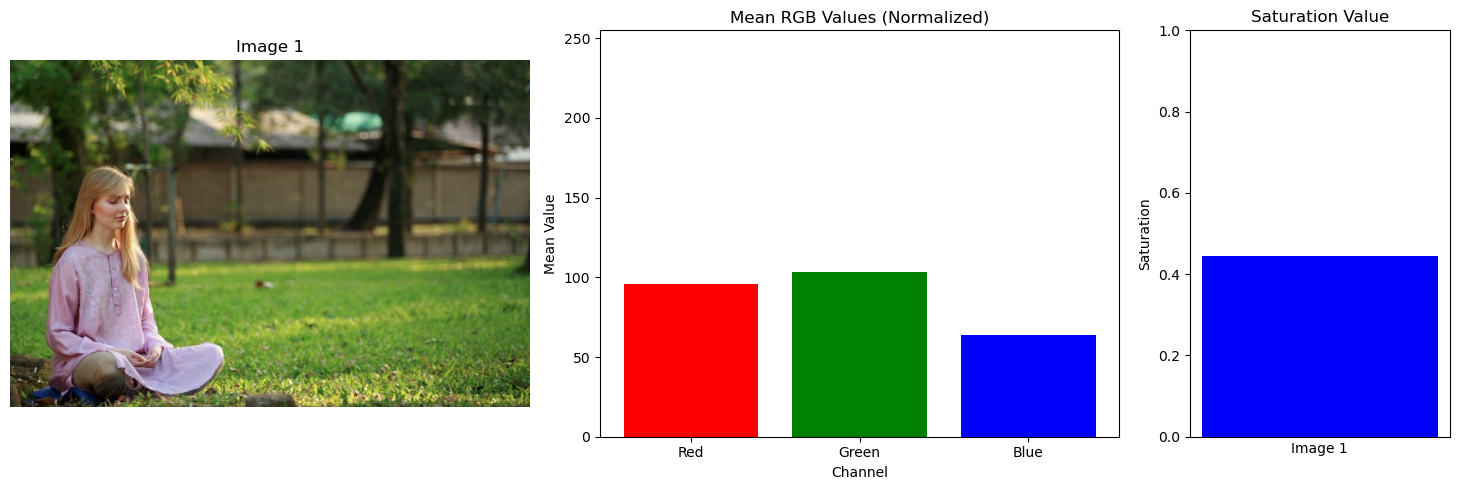

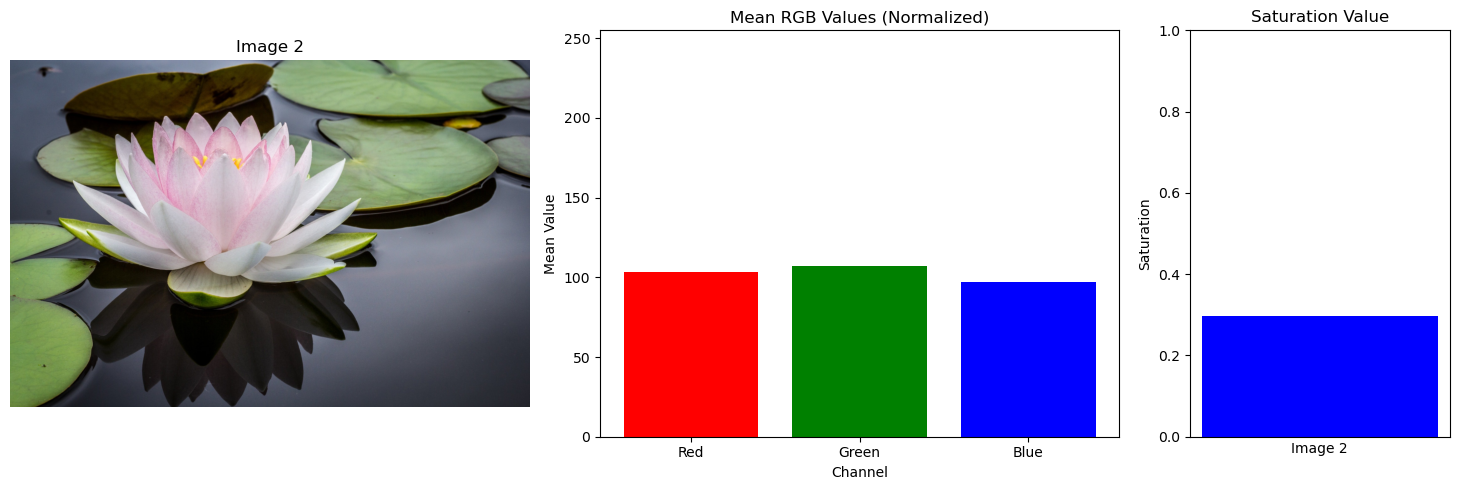

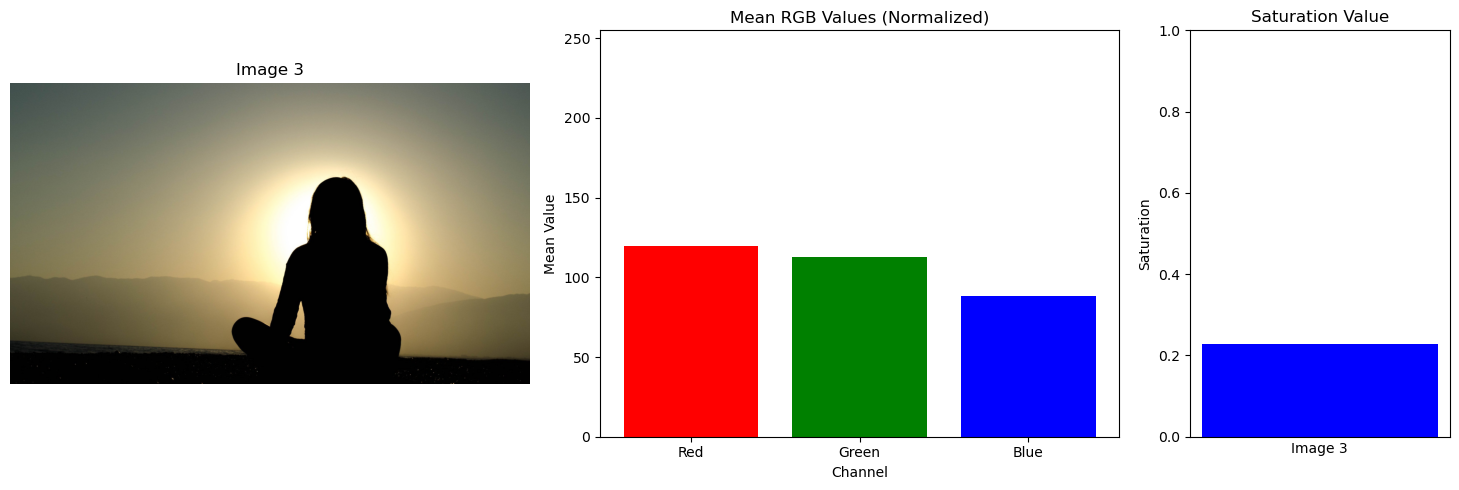

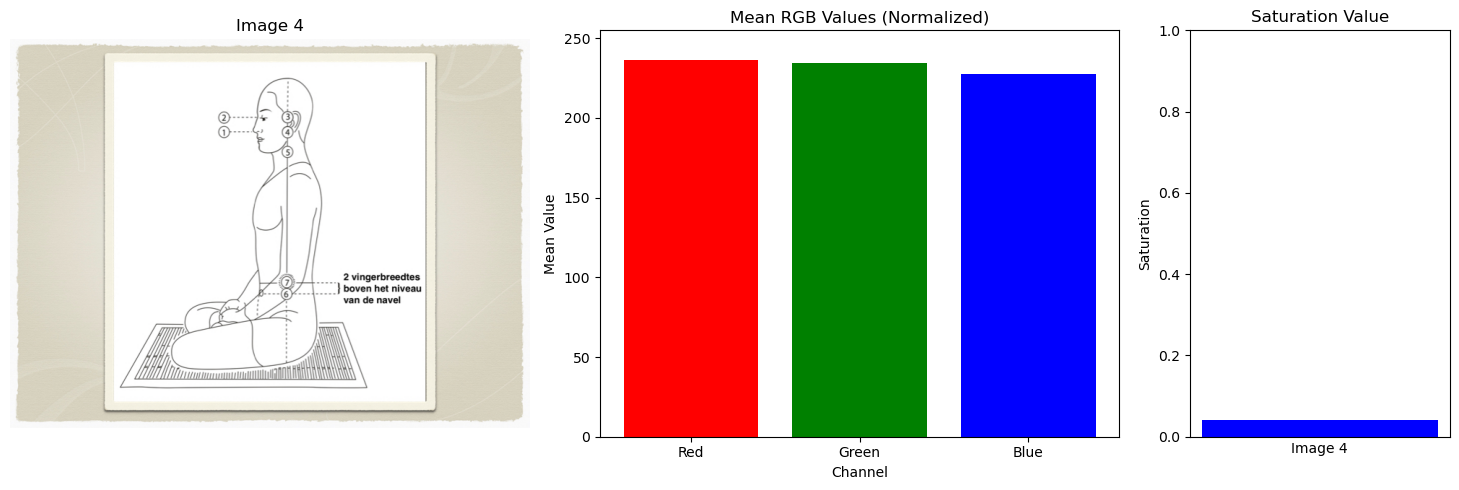

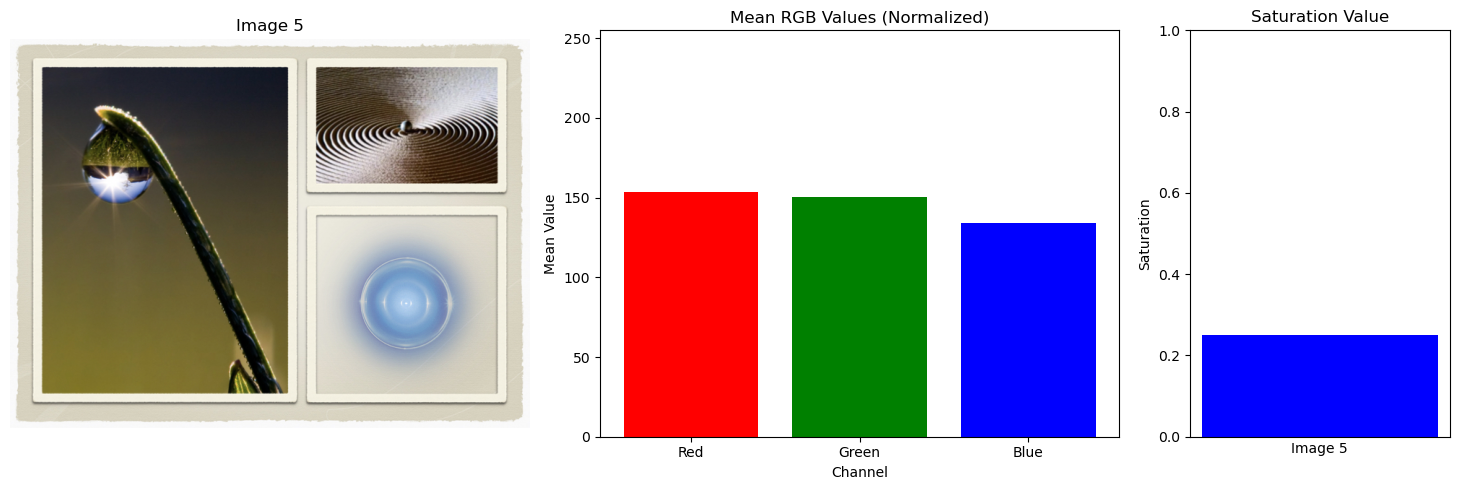

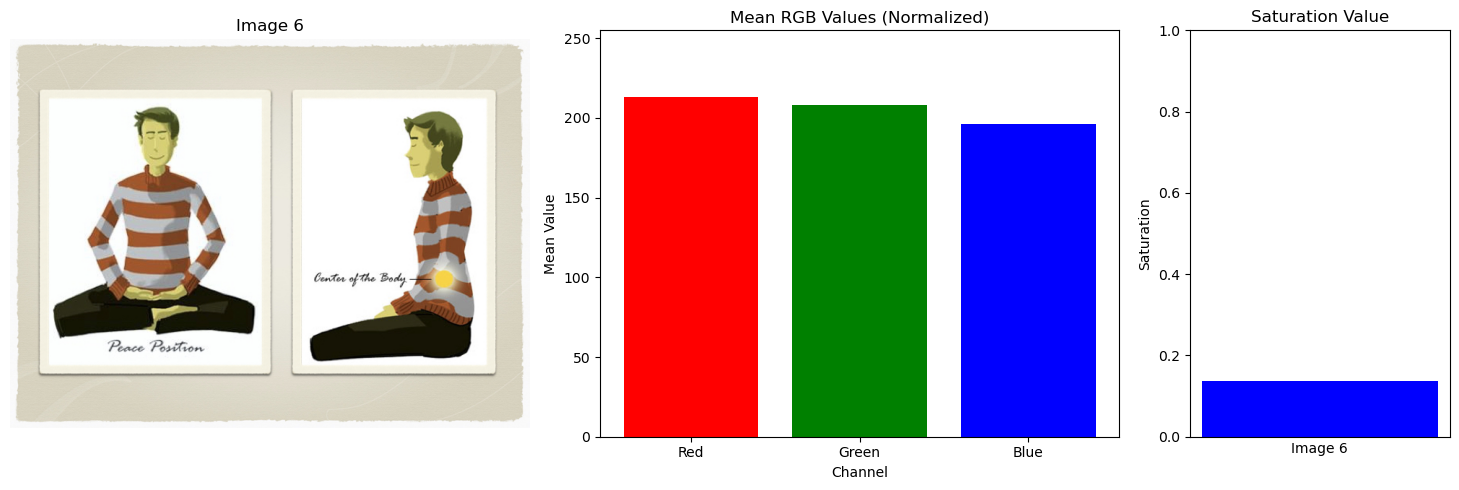

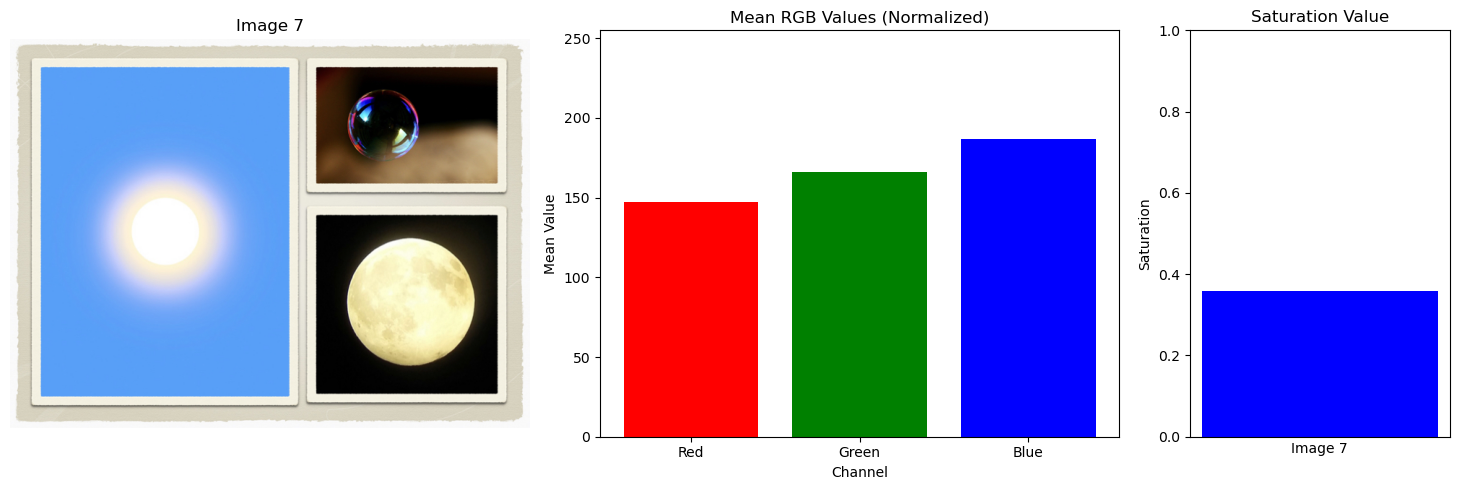

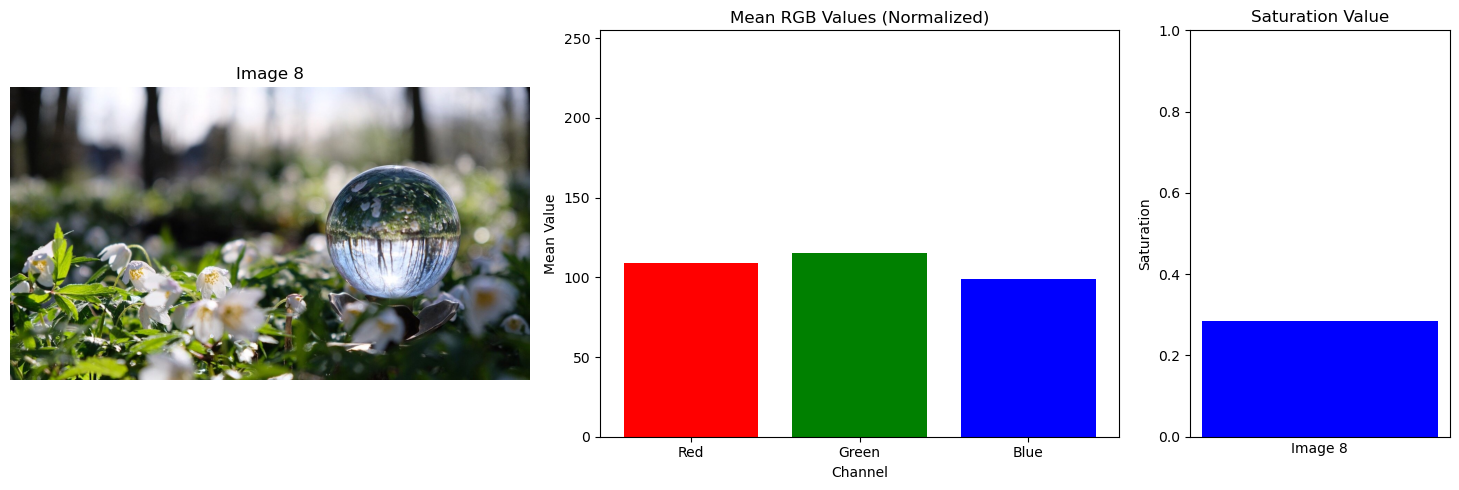

In [69]:
from io import BytesIO
import matplotlib.gridspec as gridspec

image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'] 
exclude_domains = ['https://assets.squarespace.com','https://maps.gstatic.com'] # If you notice there are images from a 
                                                                                # particular website that are not useful to your 
                                                                                # research, you can exclude them here. E.g. I 
                                                                                # didn't find the assets to be useful, so I got 
                                                                                # rid of them.

def image_saturation(img):
    img_float = np.array(img).astype(float)

    max_val = np.max(img_float, axis=2)
    min_val = np.min(img_float, axis=2)

    diff = (max_val - min_val + 1e-12)

    saturation = diff / (max_val + 1e-12)

    return np.mean(saturation)

def check_and_compute(warc_file):
    image_data_list = []
    rgb_values = []
    saturation_values = []

    with open(warc_file, 'rb') as stream:
        for record in warcio.ArchiveIterator(stream):
            if record.rec_type == 'response':
                url = record.rec_headers.get_header('WARC-Target-URI')
                for ext in image_extensions:
                    if not any(url.startswith(domain) for domain in exclude_domains) and any(url.endswith(ext) 
                                                                                          for ext in image_extensions):
                        try:
                            image_data = record.content_stream().read()
                            img = Image.open(BytesIO(image_data))

                            img_np = np.array(img)

                            rgb_mean = np.mean(img_np, axis=(0, 1))
                            rgb_values.append(rgb_mean)

                            saturation = image_saturation(img_np)
                            saturation_values.append(saturation)
                            
                            image_data_list.append(image_data)

                            print(f"RGB Mean: {rgb_mean}, Saturation: {saturation}")

                        except Exception as e:
                            continue

    return image_data_list, rgb_values, saturation_values

def plot_images(images, rgb_values, saturation_values, num_images):
        num_images = min(len(images), num_images)
        for i in range(num_images):
            img = images[i]
            rgb = rgb_values[i]
            saturation = saturation_values[i]

            fig = plt.figure(figsize=(18, 5))
            gs = fig.add_gridspec(1, 4, width_ratios=[1, 1, 0.5, 0.5])

            ax1 = fig.add_subplot(gs[0])
            ax1.imshow(Image.open(BytesIO(img)))
            ax1.set_title(f"Image {i+1}")
            ax1.axis("off")

            ax2 = fig.add_subplot(gs[1])
            ax2.bar(['Red', 'Green', 'Blue'], rgb, color=['red', 'green', 'blue'])
            ax2.set_title("Mean RGB Values (Normalized)")
            ax2.set_xlabel("Channel")
            ax2.set_ylabel("Mean Value")
            ax2.set_ylim(0, 255)  

            ax3 = fig.add_subplot(gs[2])
            ax3.bar([1], [saturation], label=f"Image {i+1}", color='b')
            ax3.set_title("Saturation Value")
            ax3.set_xlabel(f"Image {i+1}")
            ax3.set_ylabel("Saturation")
            ax3.set_xticks([])
            ax3.set_ylim(0, 1)  

            plt.tight_layout()
            plt.show()
            
warc_file_path = 'path/to/BE-942855-2457-258_P.warc'
image_data, rgb_values, saturation_values = check_and_compute(warc_file_path)
plot_images(image_data, rgb_values, saturation_values, num_images=10)

As we had expected, green takes the spotlight, although there is still a surprising amount of red. Almost in none of the images do the RGB values go up to their maximum value (255) and often stay within similar ranges, indicating that the colors are not overly saturated. As we can see in the saturation graphs, such is the case: these images have very low saturation in most cases. 

Let's also check the average RGB and saturation values for these images to get an idea of how the website uses colors.

RGB Mean: [ 95.90015677 103.65554526  63.58647138], Saturation: 0.44383587482062037
RGB Mean: [103.50609718 106.82224811  97.13045711], Saturation: 0.2969198918969282
RGB Mean: [119.43978152 112.84204386  87.98676276], Saturation: 0.22807055608963764
RGB Mean: [236.42289352 234.5571322  227.77328447], Saturation: 0.039996109672191436
RGB Mean: [153.79151749 150.22330761 134.33311214], Saturation: 0.2507883693727178
RGB Mean: [212.93427469 208.3449537  196.40954475], Saturation: 0.1363774973785418
RGB Mean: [147.21964506 166.34690329 186.87618313], Saturation: 0.35762723282053954
RGB Mean: [109.22281893 115.30704773  98.81863984], Saturation: 0.2851540433508718


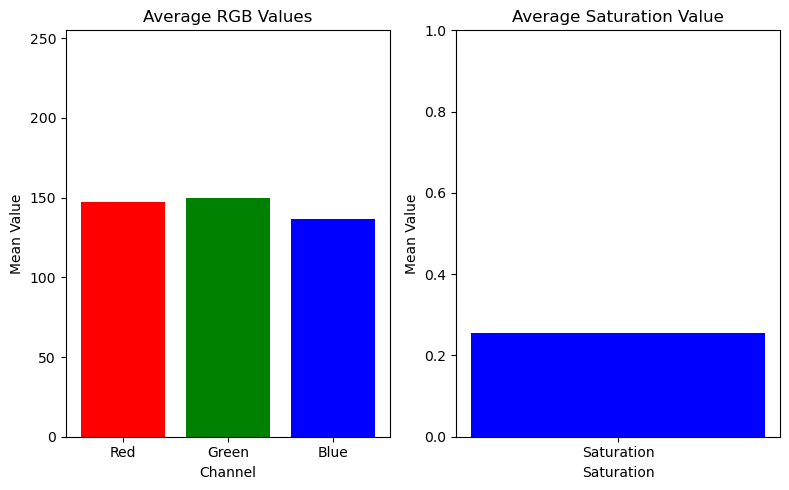

In [73]:
def plot_averages(rgb_values, saturation_values):
    avg_rgb = np.mean(rgb_values, axis=0)
    avg_saturation = np.mean(saturation_values)

    plt.figure(figsize=(8, 5))
    plt.subplot(1, 2, 1)
    plt.bar(['Red', 'Green', 'Blue'], avg_rgb, color=['red', 'green', 'blue'])
    plt.title("Average RGB Values")
    plt.xlabel("Channel")
    plt.ylabel("Mean Value")
    plt.ylim(0, 255)  

    plt.subplot(1, 2, 2)
    plt.bar(['Saturation'], [avg_saturation], color='b')
    plt.title("Average Saturation Value")
    plt.xlabel("Saturation")
    plt.ylabel("Mean Value")
    plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()
    
    
warc_file_path = 'path/to/BE-942855-2457-258_P.warc'
image_data_list, rgb_values, saturation_values = check_and_compute(warc_file_path)
plot_averages(rgb_values, saturation_values)

As we can see, across the images in the website green still takes the lead, although surprisingly blue falls behind. The saturation is quite low as predicted.

Lastly, let's create a color histogram for each of the images.

In [88]:
image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'] 
exclude_domains = ['https://assets.squarespace.com','https://maps.gstatic.com'] # If you notice there are images from a 
                                                                                # particular website that are not useful to your 
                                                                                # research, you can exclude them here. E.g. I 
                                                                                # didn't find the assets to be useful, so I got 
                                                                                # rid of them.

def process_images_in_warc(warc_file, num_images):
    def calculate_and_plot_histogram(image_data):
        try:
            image_np = np.frombuffer(image_data, np.uint8)
            
            image_cv = cv2.imdecode(image_np, cv2.IMREAD_COLOR)
            
            blue_color = cv2.calcHist([image_cv], [0], None, [256], [0, 256])
            green_color = cv2.calcHist([image_cv], [1], None, [256], [0, 256])
            red_color = cv2.calcHist([image_cv], [2], None, [256], [0, 256])
            
            max_y_value = max(np.max(blue_color), np.max(green_color), np.max(red_color))
            
            plt.figure(figsize=(12, 4))
            
            plt.subplot(1, 4, 1)
            plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title("Image")
            
            plt.subplot(1, 4, 2)
            plt.plot(blue_color, color="blue")
            plt.title("Histogram of Blue")
            plt.xlim([0, 256])
            plt.ylim([0, (max_y_value + 100)]) 
            
            plt.subplot(1, 4, 3)
            plt.plot(green_color, color="green")
            plt.title("Histogram of Green")
            plt.xlim([0, 256])
            plt.ylim([0, (max_y_value + 100)]) 
            
            plt.subplot(1, 4, 4)
            plt.plot(red_color, color="red")
            plt.title("Histogram of Red")
            plt.xlim([0, 256])
            plt.ylim([0, (max_y_value + 100)]) 
            
            plt.tight_layout()
            
        except Exception as e:
            None

    num_images_processed = 0

    with open(warc_file, 'rb') as stream:
        for record in warcio.ArchiveIterator(stream):
            if record.rec_type == 'response':
                url = record.rec_headers.get_header('WARC-Target-URI')
                for ext in image_extensions:
                    if not any(url.startswith(domain) for domain in exclude_domains) and any(url.endswith(ext) for ext in image_extensions):
                        try:
                            image_data = record.content_stream().read()
                            
                            calculate_and_plot_histogram(image_data)
                            plt.show()
                            plt.close(fig)
                            
                            num_images_processed += 1
                            
                            if num_images_processed >= max_images:
                                return 
                            
                        except Exception as e:
                            continue

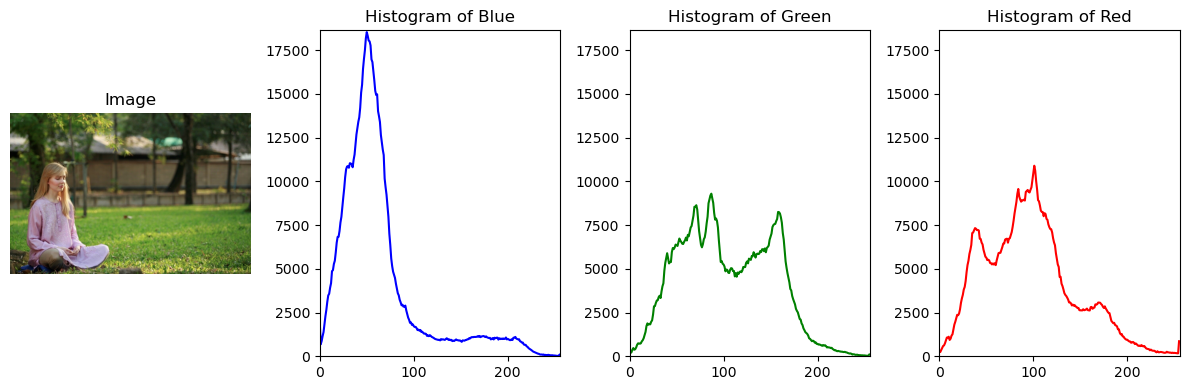

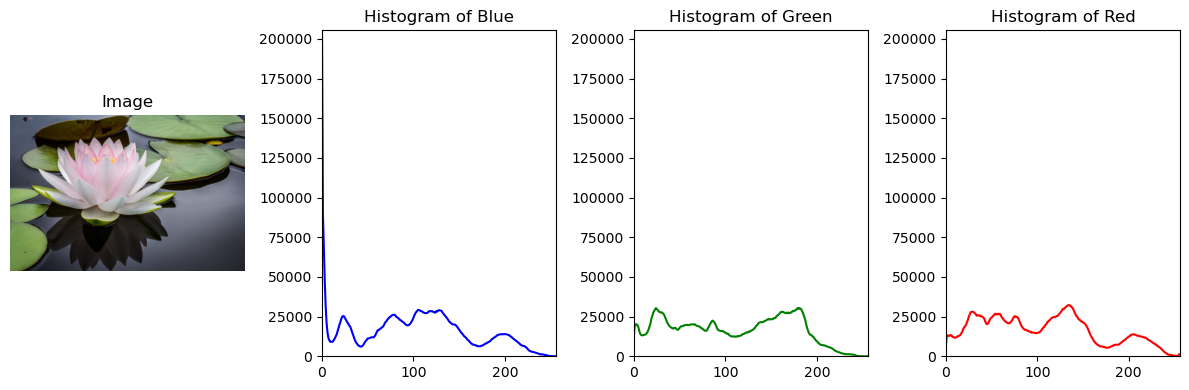

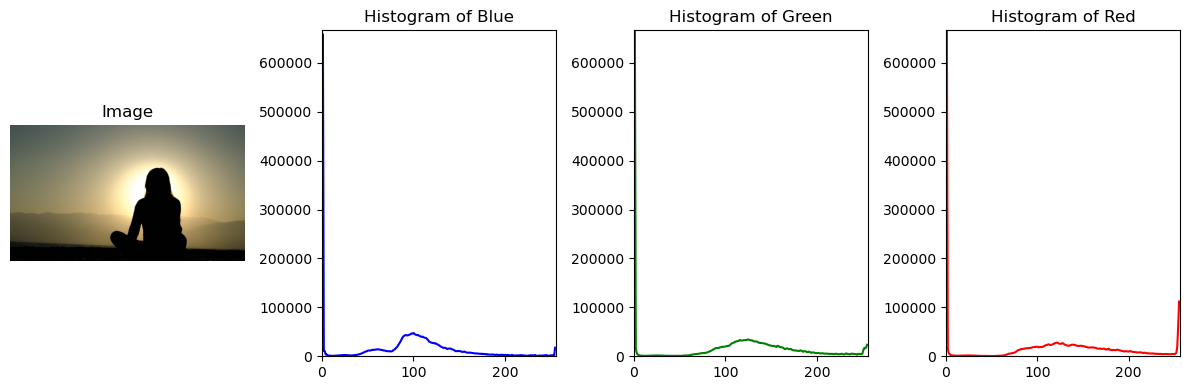

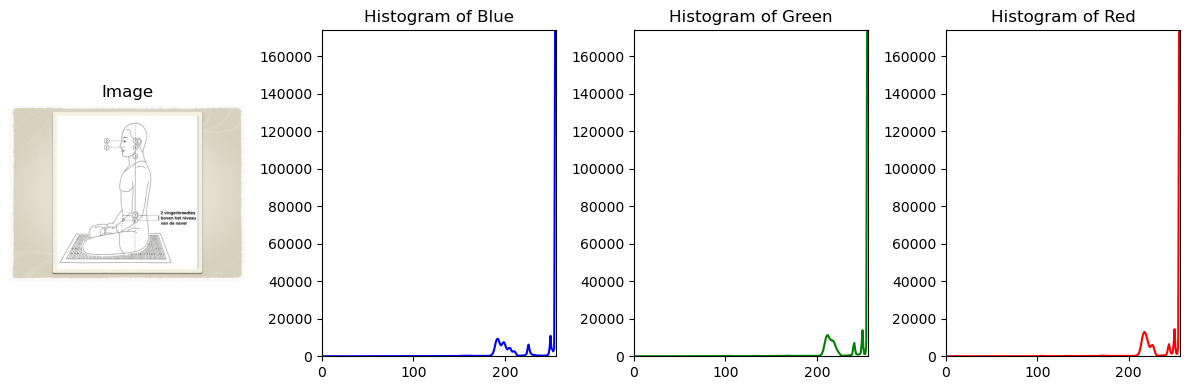

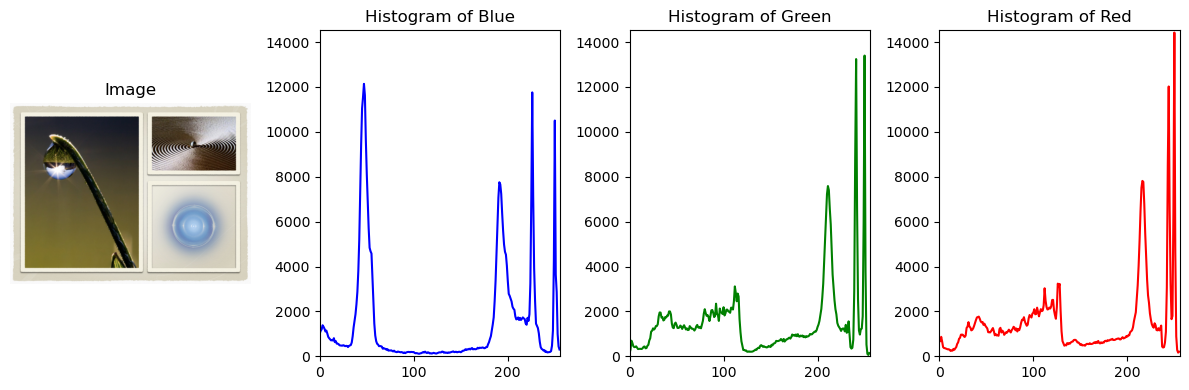

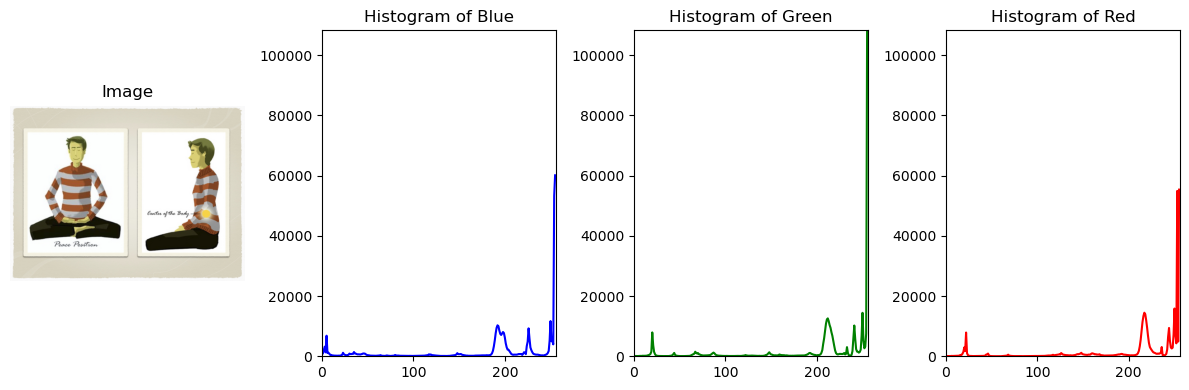

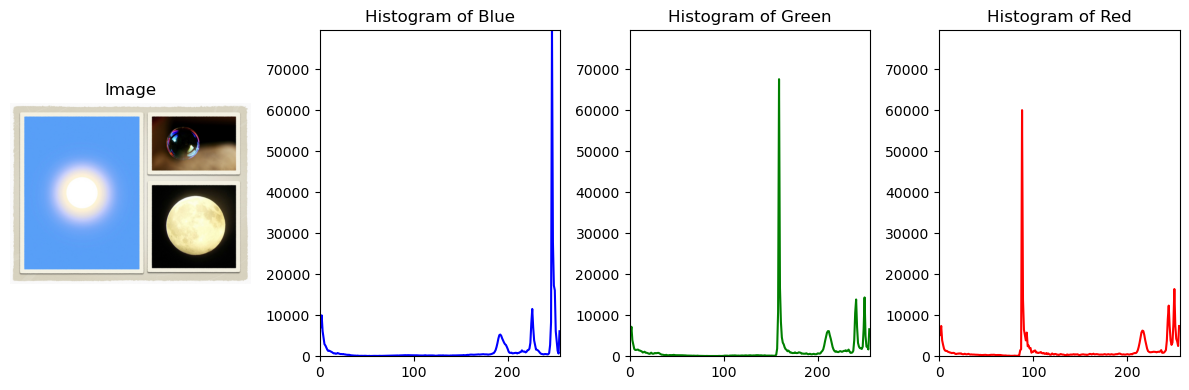

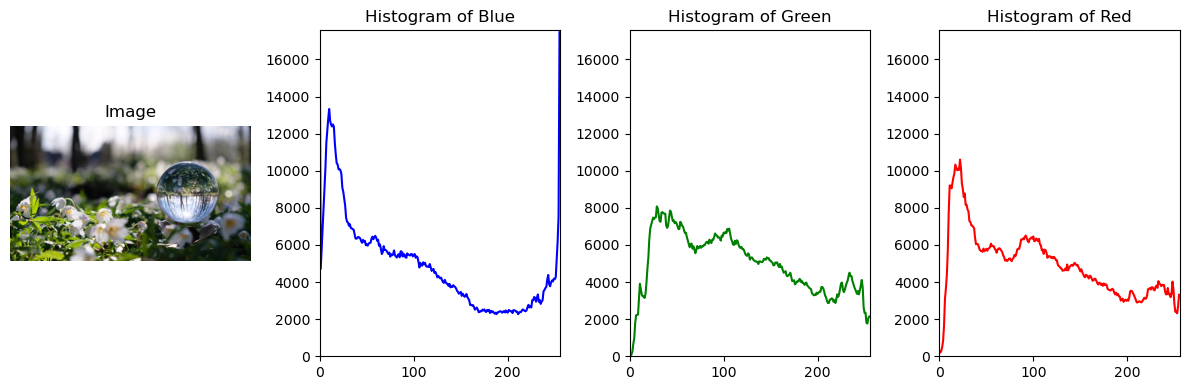

In [89]:
warc_file = "path/to/BE-942855-2457-258_P.warc"
process_images_in_warc(warc_file, num_images=10)

This concludes our exploration of image analysis using WARC files.